In [1]:
import csv
from data.wikipedia import MovieArticle
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
movies_df = pd.read_csv('movies_wikipedia.csv', index_col='id', quoting=csv.QUOTE_ALL)
print(movies_df)

                                                title       label  \
id                                                                  
0                                           Bloodshot  super-hero   
1                                            Watchmen  super-hero   
2                                         Superman II  super-hero   
3    Birds of Prey (And the Fantabulous Emancipation…  super-hero   
4                                       Green Lantern  super-hero   
..                                                ...         ...   
480       Miss Peregrine’s Home for Peculiar Children     fantasy   
481                                    The Green Mile     fantasy   
482                   Alice Through the Looking Glass     fantasy   
483                   Prince of Persia: Sands of Time     fantasy   
484             The Mummy: Tomb of the Dragon Emperor     fantasy   

                                                   URL  
id                                           

In [3]:
url = {}
title = []
edge_source = []
edge_target = []

In [4]:
counter = 0

def search_wikipedia(curr_url, depth=0, max_depth=2):
    if depth > max_depth or curr_url in url or (depth != 0 and curr_url in movies_df['URL']):
        return
    
    global counter
    
    hyperlinks_with_boxes = depth == 0
    movie_article = MovieArticle(curr_url, hyperlinks_with_boxes=hyperlinks_with_boxes)
    
    url[movie_article.url] = counter
    counter += 1
    
    title.append(movie_article.title)
    
    for hyperlink in movie_article.hyperlinks:
        search_wikipedia(hyperlink, depth + 1)
        
        if depth < max_depth or hyperlink in url:
            edge_source.append(url[movie_article.url])
            edge_target.append(url[hyperlink])

In [5]:
for index, row in movies_df.iterrows():
    print(index, row['URL'])
    search_wikipedia(row['URL'])

0 https://en.wikipedia.org/wiki/Bloodshot_(film)
1 https://en.wikipedia.org/wiki/Watchmen_(film)
2 https://en.wikipedia.org/wiki/Superman_II
3 https://en.wikipedia.org/wiki/Birds_of_Prey_(2020_film)
4 https://en.wikipedia.org/wiki/Green_Lantern_(film)
5 https://en.wikipedia.org/wiki/The_Green_Hornet_(2011_film)
6 https://en.wikipedia.org/wiki/Ghost_Rider_(2007_film)
7 https://en.wikipedia.org/wiki/Batman_%26_Robin_(film)
8 https://en.wikipedia.org/wiki/Hulk_(film)
9 https://en.wikipedia.org/wiki/Teenage_Mutant_Ninja_Turtles:_Out_of_the_Shadows
10 https://en.wikipedia.org/wiki/Unbreakable_(film)
11 https://en.wikipedia.org/wiki/Shazam!_(film)
12 https://en.wikipedia.org/wiki/The_Incredible_Hulk_(film)
13 https://en.wikipedia.org/wiki/Fantastic_Four:_Rise_of_the_Silver_Surfer
14 https://en.wikipedia.org/wiki/X-Men_(film)
15 https://en.wikipedia.org/wiki/Superman_(1978_film)
16 https://en.wikipedia.org/wiki/Fantastic_Four_(2005_film)
17 https://en.wikipedia.org/wiki/Batman_Forever
18 http

151 https://en.wikipedia.org/wiki/Monsters,_Inc.
152 https://en.wikipedia.org/wiki/Rio_2
153 https://en.wikipedia.org/wiki/Madagascar_3:_Europe%27s_Most_Wanted
154 https://en.wikipedia.org/wiki/Shrek_Forever_After
155 https://en.wikipedia.org/wiki/E.T._the_Extra-Terrestrial
156 https://en.wikipedia.org/wiki/Coco_(2017_film)
157 https://en.wikipedia.org/wiki/Shrek_the_Third
158 https://en.wikipedia.org/wiki/Inside_Out_(2015_film)
159 https://en.wikipedia.org/wiki/Ice_Age:_Dawn_of_the_Dinosaurs
160 https://en.wikipedia.org/wiki/The_Secret_Life_of_Pets
161 https://en.wikipedia.org/wiki/Monsters_University
162 https://en.wikipedia.org/wiki/Finding_Nemo
163 https://en.wikipedia.org/wiki/Despicable_Me_2
164 https://en.wikipedia.org/wiki/The_Lion_King_(2019_film)
165 https://en.wikipedia.org/wiki/Frozen_(2013_film)
166 https://en.wikipedia.org/wiki/Incredibles_2
167 https://en.wikipedia.org/wiki/Minions_(film)
168 https://en.wikipedia.org/wiki/Kung_Fu_Panda_2
169 https://en.wikipedia.org/wiki

304 https://en.wikipedia.org/wiki/Staying_Alive_(1983_film)
305 https://en.wikipedia.org/wiki/My_Fair_Lady_(film)
306 https://en.wikipedia.org/wiki/Fantasia_(1940_film)
307 https://en.wikipedia.org/wiki/Fantasia_2000
308 https://en.wikipedia.org/wiki/West_Side_Story_(1961_film)
309 https://en.wikipedia.org/wiki/Annie_(1982_film)
310 https://en.wikipedia.org/wiki/Nine_(2009_live-action_film)
311 https://en.wikipedia.org/wiki/The_Aristocats
312 https://en.wikipedia.org/wiki/Bareilly_Ki_Barfi
313 https://en.wikipedia.org/wiki/Dancer_in_the_Dark
314 https://en.wikipedia.org/wiki/Annie_(2014_film)
315 https://en.wikipedia.org/wiki/The_Nightmare_Before_Christmas
316 https://en.wikipedia.org/wiki/The_Jungle_Book_(1967_film)
317 https://en.wikipedia.org/wiki/Fiddler_on_the_Roof_(film)
318 https://en.wikipedia.org/wiki/Yentl_(film)
319 https://en.wikipedia.org/wiki/The_Blues_Brothers_(film)
320 https://en.wikipedia.org/wiki/Fame_(1980_film)
321 https://en.wikipedia.org/wiki/Hairspray_(2007_film

439 https://en.wikipedia.org/wiki/Eragon_(film)
440 https://en.wikipedia.org/wiki/Ted_2
441 https://en.wikipedia.org/wiki/Snow_White_and_the_Huntsman
442 https://en.wikipedia.org/wiki/Dark_Shadows_(film)
443 https://en.wikipedia.org/wiki/Click_(2006_film)
444 https://en.wikipedia.org/wiki/Gulliver%27s_Travels_(2010_film)
445 https://en.wikipedia.org/wiki/Percy_Jackson_%26_the_Olympians:_The_Lightning_Thief
446 https://en.wikipedia.org/wiki/Bedtime_Stories_(film)
447 https://en.wikipedia.org/wiki/Dracula_Untold
448 https://en.wikipedia.org/wiki/The_Sorcerer%27s_Apprentice_(2010_film)
449 https://en.wikipedia.org/wiki/Dolittle_(film)
450 https://en.wikipedia.org/wiki/Crouching_Tiger,_Hidden_Dragon
451 https://en.wikipedia.org/wiki/City_of_Angels_(film)
452 https://en.wikipedia.org/wiki/Percy_Jackson:_Sea_of_Monsters
453 https://en.wikipedia.org/wiki/Jack_the_Giant_Slayer
454 https://en.wikipedia.org/wiki/Journey_to_the_West:_Conquering_the_Demons
455 https://en.wikipedia.org/wiki/Immorta

In [6]:
nodes = pd.DataFrame({'URL': sorted(url, key=url.get), 'title': title})
edges = pd.DataFrame({'source': edge_source, 'target': edge_target})

In [7]:
nodes.to_csv('movies_nodes.csv', index_label='id', quoting=csv.QUOTE_ALL)
edges.to_csv('movies_edges.csv', index_label='id', quoting=csv.QUOTE_ALL)

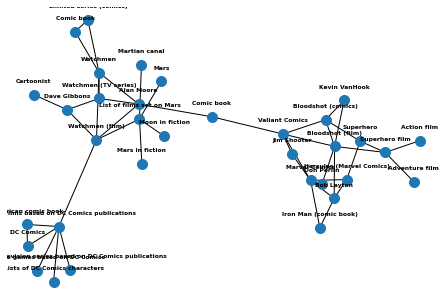

In [8]:
graph = nx.from_edgelist(zip(edge_source[:50], edge_target[:50]))
pos_nodes = nx.spring_layout(graph)
nx.draw(graph, pos=pos_nodes, node_size=100)

pos_titles = {}
for node, coords in pos_nodes.items():
    pos_titles[node] = (coords[0], coords[1] + 0.04)

node_titles = {}
for node in graph.nodes():
    node_titles[node] = nodes.iloc[node].title
    
nx.draw_networkx_labels(graph, pos_titles, labels=node_titles, font_size=6, font_weight='bold')
    
plt.show()